<a href="https://colab.research.google.com/github/daivik05/Plant-Disease-Classification-using-Convolutional-Neural-Networks/blob/master/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies and Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

from keras.applications import MobileNetV2
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D

In [2]:
!pip install tensorflow


# Load Data

In [3]:
repo_name = 'Plant-Disease-Classification-using-Convolutional-Neural-Networks'
repo_url = f'https://github.com/daivik05/Plant-Disease-Classification-using-Convolutional-Neural-Networks.git'  # Replace your_username
!git clone $repo_url

Cloning into 'Plant-Disease-Classification-using-Convolutional-Neural-Networks'...
remote: Enumerating objects: 88013, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 88013 (delta 32), reused 0 (delta 0), pack-reused 87935
Receiving objects: 100% (88013/88013), 1.32 GiB | 26.89 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (87905/87905), done.


In [4]:
project_dir = f'/content/{repo_name}'
%cd $project_dir

/content/Plant-Disease-Classification-using-Convolutional-Neural-Networks


In [5]:
train_path = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [6]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 train_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 70295 files belonging to 38 classes.


In [7]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
 valid_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 17572 files belonging to 38 classes.


# Split and generate data

In [8]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [9]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 56251 images belonging to 38 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3503 images belonging to 38 classes.


In [11]:
for img, label in train_generator:
    print("Training Batch Shapes:", img.shape, label.shape)
    break

for img, label in validation_generator:
    print("Validation Batch Shapes:", img.shape, label.shape)
    break



Training Batch Shapes: (32, 224, 224, 3) (32, 38)
Validation Batch Shapes: (32, 224, 224, 3) (32, 38)


In [12]:
train_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [13]:
len(train_data.class_names)

38

In [14]:
class_labels = train_data.class_names
class_labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [15]:
for img, label in train_generator:
    #print(img)
    print(label)
    break

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
label[10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [17]:
len(class_labels)

38

# Train and Save Model

In [18]:
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation='relu'))  # Add a dense layer with 1024 units
model.add(Dense(100, activation='relu'))   # Add another dense layer with 512 units
model.add(Dense(len(class_labels), activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 38)                3838      
                                                           

In [19]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)


In [20]:
model.add(Dense(len(class_labels), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:

# Train the model
history = model.fit(
    train_generator,
    batch_size=256,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,  # Specify the number of steps per epoch
    validation_steps=validation_steps  # Specify the number of validation steps
)

Epoch 1/15
1758/1758 [==============================] - 756s 424ms/step - loss: 2.9829 - accuracy: 0.1767 - val_loss: 2.5643 - val_accuracy: 0.1981
Epoch 2/15
1758/1758 [==============================] - 767s 436ms/step - loss: 2.3271 - accuracy: 0.2063 - val_loss: 2.1881 - val_accuracy: 0.2458
Epoch 3/15
1758/1758 [==============================] - 779s 443ms/step - loss: 2.0499 - accuracy: 0.2732 - val_loss: 1.9637 - val_accuracy: 0.3280
Epoch 4/15
1758/1758 [==============================] - 827s 470ms/step - loss: 1.8591 - accuracy: 0.3579 - val_loss: 1.7858 - val_accuracy: 0.3820
Epoch 5/15
1758/1758 [==============================] - 805s 458ms/step - loss: 1.6948 - accuracy: 0.4267 - val_loss: 1.6477 - val_accuracy: 0.4433
Epoch 6/15
1758/1758 [==============================] - 818s 465ms/step - loss: 1.5553 - accuracy: 0.4889 - val_loss: 1.5242 - val_accuracy: 0.5024
Epoch 7/15
1758/1758 [==============================] - 816s 464ms/step - loss: 1.4188 - accuracy: 0.5490 - val_

In [22]:
# Save The Model
model.save("plant_disease_model.h5")

In [23]:
loss,acc = model.evaluate(train_generator)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(validation_generator)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

1758/1758 [==============================] - 751s 427ms/step - loss: 0.4484 - accuracy: 0.8886
Loss on Train data: 0.44836148619651794
Accuracy on Train data: 0.8885708451271057
110/110 [==============================] - 47s 430ms/step - loss: 0.5165 - accuracy: 0.8644
Loss on Test data: 0.5164706707000732
Accuracy on Test data: 0.8644019365310669


In [24]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plot Performance

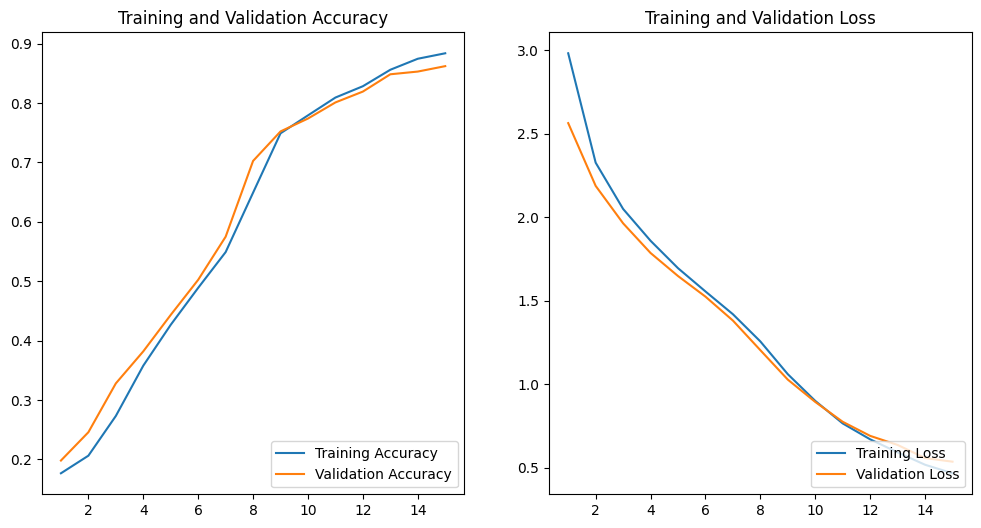

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ensure that acc, val_acc, loss, and val_loss have the same length
assert len(acc) == len(val_acc) == len(loss) == len(val_loss)

EPOCHS = len(acc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label="Training Accuracy")
plt.plot(range(1, EPOCHS + 1), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label="Training Loss")
plt.plot(range(1, EPOCHS + 1), val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()


# Predicting the test data

In [26]:
# Load the test image
from tensorflow.keras.preprocessing import image
img_path = 'test/test/TomatoHealthy1.JPG'
img_path = "test/test/TomatoHealthy3.JPG"
img = image.load_img(img_path, target_size=(224, 224))
#img
img_array = image.img_to_array(img)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
# Scale The Data
img_array = img_array/255
print(img_array.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [27]:
y_pred = model.predict(img_array)
y_pred

1/1 [==============================] - 2s 2s/step


array([[1.44221119e-07, 2.40576288e-08, 1.94383301e-08, 1.85821690e-07,
        6.02818631e-08, 1.40598502e-07, 7.08231873e-09, 3.73151510e-09,
        1.42909062e-09, 5.67694558e-10, 2.33076031e-10, 1.86372997e-08,
        1.75182464e-08, 1.04814554e-02, 8.31985788e-04, 2.53493981e-09,
        4.28524260e-07, 1.19484700e-02, 4.01747480e-09, 2.84185859e-07,
        1.16874643e-08, 4.41231641e-05, 2.35923693e-07, 9.44384393e-09,
        1.12576885e-07, 1.75367557e-02, 3.67631969e-09, 3.76080278e-09,
        1.47863091e-06, 7.99516449e-04, 5.33277402e-04, 1.68192647e-02,
        1.03500590e-03, 5.37049659e-02, 4.97628637e-02, 3.17216404e-07,
        1.10713616e-02, 8.25427473e-01]], dtype=float32)

In [28]:
np.argmax(y_pred[0])

37

In [29]:
len(y_pred[0])

38

In [30]:
class_labels[np.argmax(y_pred[0])]

'Tomato___healthy'

In [31]:
dict_class = {'Label':class_labels}
dict_class

{'Label': ['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Cherry_(including_sour)___healthy',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___healthy',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Grape___healthy',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___Late_blight',
  'Potato___healthy',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___Leaf_scorch',
  'Strawberry___healthy',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_s

In [32]:
dict_class['Label'][2]

'Apple___Cedar_apple_rust'

In [33]:
import json

with open("class_labels.json",'w') as file:
    json.dump(dict_class,file)